In [108]:
import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay





%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [109]:
src_dir = 'C:\\Users\\USER\\Desktop\\rps-cv-images'
paper_dir = os.path.join(src_dir,'paper')
rock_dir = os.path.join(src_dir,'rock')
scissors_dir = os.path.join(src_dir,'scissors')

In [110]:
print('paper : ',len(os.listdir(paper_dir)))
print('rock : ',len(os.listdir(rock_dir)))
print('scissors : ',len(os.listdir(scissors_dir)))

paper :  712
rock :  726
scissors :  750


In [111]:
labels = ['paper','scissors','rock']

In [112]:
def input_target_split(train_dirs, labels):
    dataset = []
    count = 0
    for label, train_dir in zip(labels, train_dirs):
        for image in os.listdir(train_dir):
            img = load_img(os.path.join(train_dir, image), target_size=(128, 128))
            img = img_to_array(img)
            img = img / 255.0
            dataset.append((img, count))
       
        count += 1
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X), np.array(y)

In [113]:
train_dirs = [paper_dir, scissors_dir, rock_dir]

data_rps, labels_rps = input_target_split(train_dirs,labels)

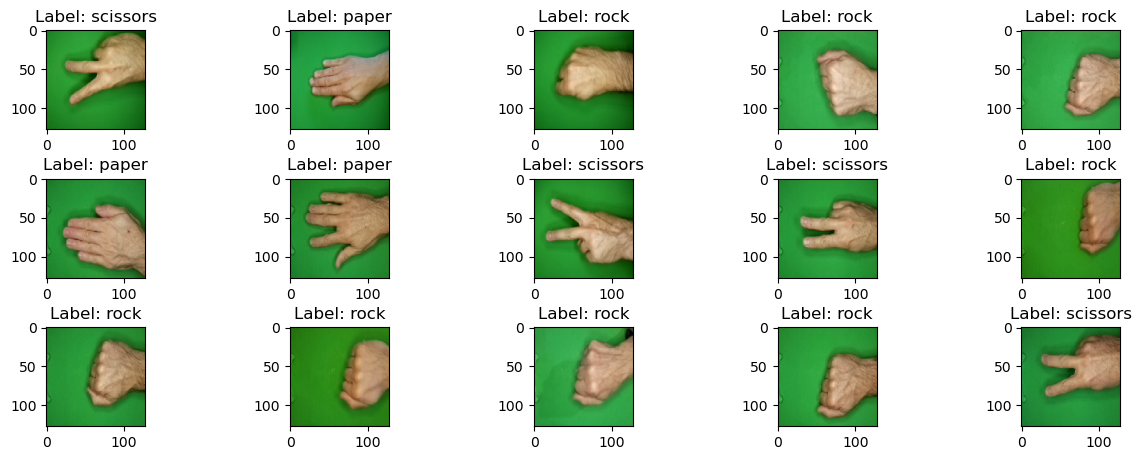

In [114]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(data_rps[i])
    plt.title(f'Label: {labels[labels_rps[i]]}')

# Label_names:
- 0: paper
- 1: scissors 
- 2: rock

In [115]:
data_rps_reshaped = data_rps.reshape(data_rps.shape[0], -1)

# Create a DataFrame with X_reshaped and y
df = pd.DataFrame(data=np.column_stack((data_rps_reshaped, labels_rps)), columns=[f'pixel_{i}' for i in range(data_rps_reshaped.shape[1])] + ['label'])
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_49143,pixel_49144,pixel_49145,pixel_49146,pixel_49147,pixel_49148,pixel_49149,pixel_49150,pixel_49151,label
0,0.101961,0.478431,0.129412,0.105882,0.482353,0.133333,0.105882,0.490196,0.137255,0.101961,...,0.047059,0.352941,0.054902,0.047059,0.341176,0.047059,0.043137,0.337255,0.043137,1.0
1,0.062745,0.439216,0.152941,0.054902,0.443137,0.152941,0.054902,0.443137,0.152941,0.078431,...,0.019608,0.333333,0.043137,0.031373,0.333333,0.047059,0.027451,0.329412,0.043137,0.0
2,0.082353,0.458824,0.117647,0.082353,0.458824,0.117647,0.074510,0.470588,0.113725,0.078431,...,0.035294,0.329412,0.047059,0.039216,0.325490,0.031373,0.023529,0.313726,0.019608,2.0
3,0.176471,0.533333,0.207843,0.184314,0.529412,0.207843,0.172549,0.529412,0.203922,0.176471,...,0.200000,0.576471,0.235294,0.203922,0.568627,0.231373,0.207843,0.572549,0.235294,2.0
4,0.200000,0.556863,0.223529,0.200000,0.556863,0.223529,0.192157,0.549020,0.215686,0.196078,...,0.192157,0.592157,0.254902,0.203922,0.588235,0.254902,0.207843,0.592157,0.250980,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,0.145098,0.458824,0.149020,0.133333,0.450980,0.133333,0.152941,0.462745,0.145098,0.137255,...,0.156863,0.505882,0.164706,0.152941,0.494118,0.156863,0.156863,0.498039,0.160784,0.0
2184,0.054902,0.376471,0.082353,0.062745,0.384314,0.098039,0.054902,0.400000,0.098039,0.070588,...,0.050980,0.368627,0.066667,0.058824,0.364706,0.058824,0.050980,0.356863,0.047059,2.0
2185,0.125490,0.458824,0.152941,0.129412,0.450980,0.149020,0.125490,0.458824,0.152941,0.117647,...,0.133333,0.486275,0.152941,0.125490,0.486275,0.141176,0.125490,0.482353,0.149020,1.0
2186,0.317647,0.341176,0.137255,0.286275,0.309804,0.105882,0.219608,0.313726,0.105882,0.152941,...,0.082353,0.376471,0.082353,0.082353,0.376471,0.082353,0.074510,0.368627,0.074510,0.0


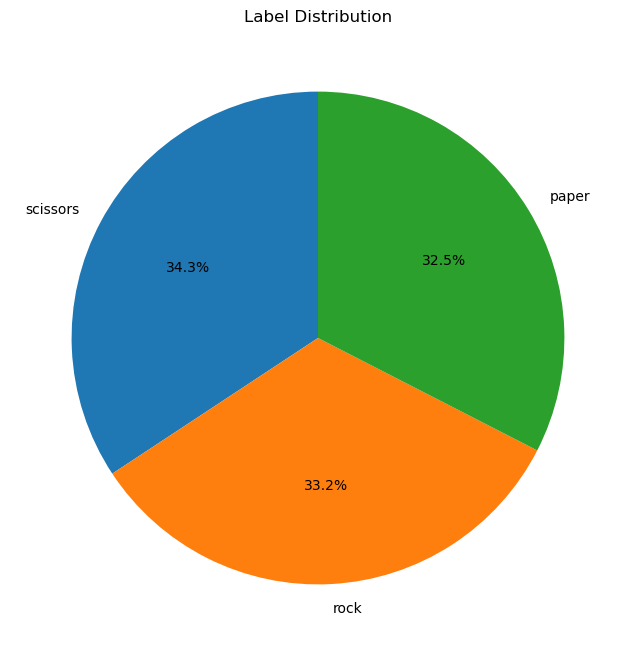

In [116]:

labels_num = df['label']

# Create a dictionary to map numerical labels to class names
label_names = {0: 'paper', 1: 'scissors', 2: 'rock'}

# Map numerical labels to class names in labels_num
class_labels = [label_names[label] for label in labels_num]

# Count the occurrences of each label
label_counts = pd.Series(class_labels).value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution')
plt.show()

## We can understand is balanced, So we don't need to adjust it

In [117]:
print(data_rps.shape)
print(labels_rps.shape)

(2188, 128, 128, 3)
(2188,)


## We will convert the images from RGB to gray scale

In [118]:
# def convert_to_gray(images):
#     gray_images = [cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in images]
#     return np.array(gray_images)

# # Convert data_rps to grayscale
# data_rps_gray = convert_to_gray(data_rps)

# # Check the new shape
# print(data_rps_gray.shape)

In [119]:
# num_images_to_display = 5
# for i in range(num_images_to_display):
#     plt.subplot(1, num_images_to_display, i + 1)
#     plt.imshow(data_rps_gray[i], cmap='gray')
#     plt.axis('off')

# plt.show()

In [120]:
# data_rps_gray = data_rps_gray.reshape((2188, 128*128))

## Split the data

In [121]:
# X_train, X_test, y_train, y_test = train_test_split(data_rps_gray, labels_rps, test_size=0.25, random_state=42)
# print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

In [122]:
X_train, X_test, y_train, y_test = train_test_split(data_rps, labels_rps, test_size=0.25, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([0, 1, 2]), array([533, 554, 554], dtype=int64)) (array([0, 1, 2]), array([179, 196, 172], dtype=int64))


## Dummy model

In [123]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print("The DummyClassifier score is:" ,round(accuracy_score(y_pred,y_test),4))

The DummyClassifier score is: 0.3583


## Split the train

In [124]:
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train,y_train, test_size=0.25, random_state=42)

## Convolutional neural network (CNN)


## Without cross validation

In [103]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Split the data into training and validation sets
X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train_reshaped, y_train, test_size=0.25, random_state=42)

# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 classes (paper, scissors, rock)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the CNN model
model = create_cnn_model()
model.fit(X_train_fold, y_train_fold, epochs=5, validation_data=(X_val_fold, y_val_fold))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/5
39/39 [==============================] - 10s 241ms/step - loss: 2.5195 - accuracy: 0.4911 - val_loss: 0.7819 - val_accuracy: 0.7591
Epoch 2/5
39/39 [==============================] - 9s 244ms/step - loss: 0.6465 - accuracy: 0.7959 - val_loss: 0.5640 - val_accuracy: 0.7859
Epoch 3/5
39/39 [==============================] - 9s 240ms/step - loss: 0.4965 - accuracy: 0.8236 - val_loss: 0.5032 - val_accuracy: 0.8248
Epoch 4/5
39/39 [==============================] - 9s 242ms/step - loss: 0.4073 - accuracy: 0.8659 - val_loss: 0.4819 - val_accuracy: 0.8078
Epoch 5/5
18/18 [==============================] - 1s 45ms/step - loss: 0.2678 - accuracy: 0.9232
Test Accuracy: 0.9232175350189209


## With cross validation

In [104]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold

# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 classes (paper, scissors, rock)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define cross-validation parameters
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, val_index in skf.split(X_train_reshaped, y_train):
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train the CNN model
    model = create_cnn_model()
    model.fit(X_train_fold, y_train_fold, epochs=5, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
    print(f'Test Accuracy: {test_acc}')



Epoch 1/5
41/41 [==============================] - 10s 227ms/step - loss: 2.3102 - accuracy: 0.5312 - val_loss: 0.6863 - val_accuracy: 0.7599
Epoch 2/5
41/41 [==============================] - 9s 231ms/step - loss: 0.4880 - accuracy: 0.8422 - val_loss: 0.4966 - val_accuracy: 0.8419
Epoch 3/5
41/41 [==============================] - 9s 227ms/step - loss: 0.3024 - accuracy: 0.9017 - val_loss: 0.3973 - val_accuracy: 0.8632
Epoch 4/5
41/41 [==============================] - 9s 228ms/step - loss: 0.1976 - accuracy: 0.9314 - val_loss: 0.3493 - val_accuracy: 0.8754
Epoch 5/5
18/18 [==============================] - 1s 43ms/step - loss: 0.2386 - accuracy: 0.9159
Test Accuracy: 0.9159049391746521
Epoch 1/5
42/42 [==============================] - 10s 219ms/step - loss: 1.9936 - accuracy: 0.5682 - val_loss: 0.6878 - val_accuracy: 0.7378
Epoch 2/5
42/42 [==============================] - 9s 213ms/step - loss: 0.4741 - accuracy: 0.8294 - val_loss: 0.4089 - val_accuracy: 0.8598
Epoch 3/5
42/42 [===

Epoch 1/5
41/41 [==============================] - 10s 228ms/step - loss: 3.6383 - accuracy: 0.4146 - val_loss: 0.8746 - val_accuracy: 0.7021
Epoch 2/5
41/41 [==============================] - 10s 234ms/step - loss: 0.7085 - accuracy: 0.7675 - val_loss: 0.5797 - val_accuracy: 0.7964
Epoch 3/5
41/41 [==============================] - 10s 239ms/step - loss: 0.5353 - accuracy: 0.8361 - val_loss: 0.5003 - val_accuracy: 0.8237
Epoch 4/5
41/41 [==============================] - 10s 238ms/step - loss: 0.4506 - accuracy: 0.8529 - val_loss: 0.4805 - val_accuracy: 0.8450
Epoch 5/5
18/18 [==============================] - 1s 47ms/step - loss: 0.3814 - accuracy: 0.8830
Test Accuracy: 0.8829981684684753
Epoch 1/5
42/42 [==============================] - 11s 240ms/step - loss: 1.6009 - accuracy: 0.5453 - val_loss: 0.6608 - val_accuracy: 0.7774
Epoch 2/5
42/42 [==============================] - 10s 241ms/step - loss: 0.5790 - accuracy: 0.7951 - val_loss: 0.4963 - val_accuracy: 0.8415
Epoch 3/5
42/42 

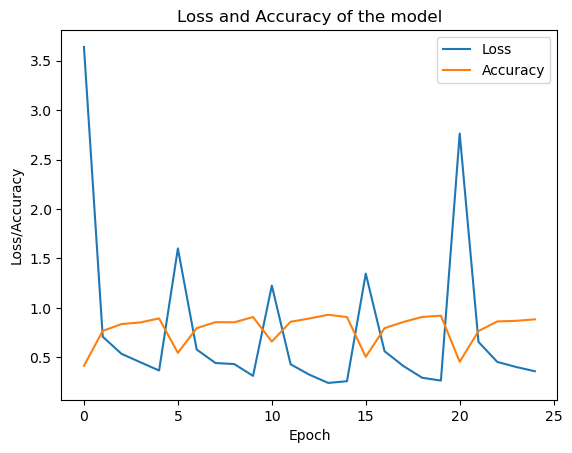

In [125]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 classes (paper, scissors, rock)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define cross-validation parameters
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store loss and accuracy values during training
losses = []
accuracies = []

# Perform cross-validation
for train_index, val_index in skf.split(X_train_reshaped, y_train):
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train the CNN model
    model = create_cnn_model()
    history = model.fit(X_train_fold, y_train_fold, epochs=5, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
    print(f'Test Accuracy: {test_acc}')

    # Store loss and accuracy values
    losses.extend(history.history['loss'])
    accuracies.extend(history.history['accuracy'])




In [ ]:
# Plot the loss and the accuracy
plt.figure()  # Create a new figure
plt.plot(losses)
plt.plot(accuracies)
plt.title('Loss and Accuracy of the model')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(['Loss', 'Accuracy'])
plt.show()

## There is improvement with cross validation

18/18 [==============================] - 1s 48ms/step


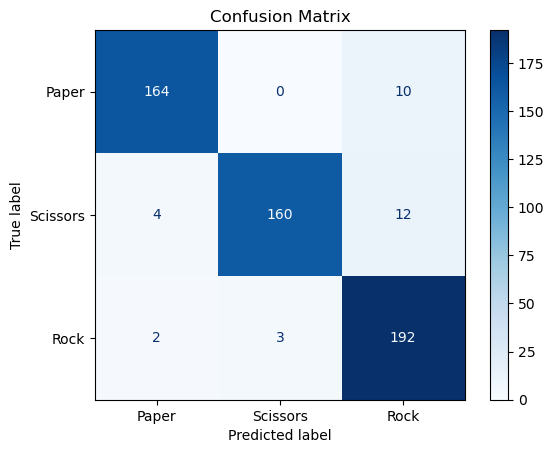

In [107]:
# Predict the labels for the test set
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
labels = ['Paper', 'Scissors', 'Rock']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()